In [217]:
#Portfolio Risk Management and Optimization using Statistical analysis In Python
#Jupyter Notebook, Python 3, Statistics, Python Packages – Numpy, Pandas, Matplotlib
#•	Used Modern Portfolio Theory
#•	Stocks considered – Apple, Microsoft, Netflix, Amazon, Google
#•	Considered stock data from 1-1-2010 till date
#•	Individual Stock Analysis - Daily Returns, Covariance & Correlation
#•	Portfolio Analysis – Mean, Variance & Volatility
#•	Performed Monte Carlo Simulation (10000 random weight combinations)
#•	Plotted Efficient Frontier
#•	Optimized based on Sharpe Ratio

In [218]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [219]:
tickers = [ 'AAPL', 'MSFT', 'NFLX', 'AMZN', 'GOOG']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='01/01/2010')['Adj Close']

In [220]:
data.head()

,AAPL,MSFT,NFLX,AMZN,GOOG
Date,,,,,
2009-12-31,26.061205,23.858992,7.870000,134.520004,308.832428
2010-01-04,26.466835,24.226894,7.640000,133.899994,312.204773
2010-01-05,26.512596,24.234720,7.358572,134.690002,310.829926
2010-01-06,26.090879,24.085989,7.617143,132.250000,302.994293
2010-01-07,26.042646,23.835503,7.485714,130.000000,295.940735


<p><b> Graphical Representation of Daily Stock Prices :</b></p>

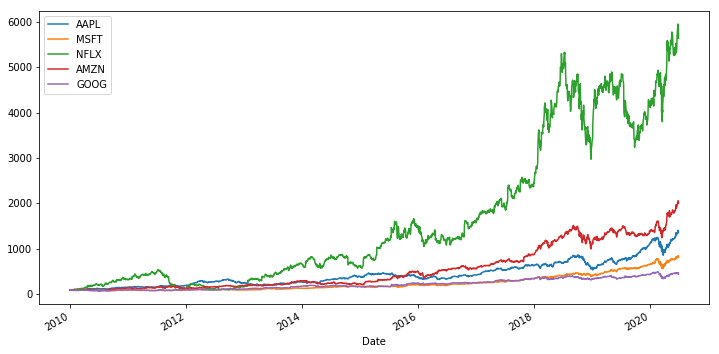

In [221]:
(data/data.iloc[0] * 100).plot(figsize = (12,6))

<p><b> Individual Security Returns & Risk : </b></p>

In [222]:
daily_returns = np.log(data/data.shift(1))
daily_returns

,AAPL,MSFT,NFLX,AMZN,GOOG
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015445,0.015302,-0.029660,-0.004620,0.010860
2010-01-05,0.001728,0.000323,-0.037532,0.005883,-0.004413
2010-01-06,-0.016034,-0.006156,0.034535,-0.018282,-0.025532
2010-01-07,-0.001850,-0.010454,-0.017405,-0.017160,-0.023555
2010-01-08,0.006626,0.006873,0.017030,0.026717,0.013243
2010-01-11,-0.008860,-0.012802,-0.001314,-0.024335,-0.001513
2010-01-12,-0.011440,-0.006629,-0.016288,-0.022977,-0.017842
2010-01-13,0.014007,0.009269,0.029909,0.013726,-0.005758


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E5A8CEAC8>,
      dtype=object)

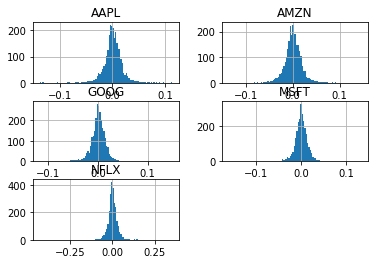

In [223]:
daily_returns.hist(bins=100)

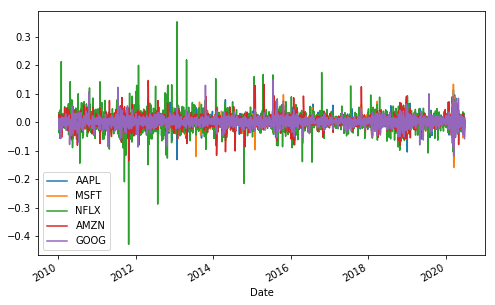

In [224]:
daily_returns.plot(figsize = (8,5))

In [225]:
annual_returns = daily_returns.mean() * 252
annual_returns

AAPL    0.249021
MSFT    0.201260
NFLX    0.384963
AMZN    0.286152
GOOG    0.141552
dtype: float64

In [226]:
covar = daily_returns.cov() * 252
covar

,AAPL,MSFT,NFLX,AMZN,GOOG
AAPL,0.076579,0.038219,0.035967,0.037398,0.038255
MSFT,0.038219,0.063154,0.038958,0.040415,0.039433
NFLX,0.035967,0.038958,0.267262,0.066096,0.044578
AMZN,0.037398,0.040415,0.066096,0.098403,0.046465
GOOG,0.038255,0.039433,0.044578,0.046465,0.066525


In [227]:
corr = daily_returns.corr()
corr

,AAPL,MSFT,NFLX,AMZN,GOOG
AAPL,1.000000,0.549565,0.251412,0.430819,0.535967
MSFT,0.549565,1.000000,0.299867,0.512676,0.608377
NFLX,0.251412,0.299867,1.000000,0.407572,0.334318
AMZN,0.430819,0.512676,0.407572,1.000000,0.574293
GOOG,0.535967,0.608377,0.334318,0.574293,1.000000


<p><b>Portfolio Analysis (assigning random weights to the stocks) :</b></p>

In [228]:
weights = np.random.random(len(tickers))
weights /= np.sum(weights)
weights

array([0.01540347, 0.26209925, 0.24706453, 0.23767438, 0.23775837])

<p><b> Expected Portfolio Return : </b></p>

In [229]:
np.dot(annual_returns, weights)

0.2533627161301484

<p><b> Expected Portfolio Variance : </b></p>

In [230]:
np.dot(weights.T, np.dot(covar, weights))

0.06437263270315516

<p><b> Expected Portfolio Volatility : </b></p>

In [231]:
np.sqrt(np.dot(weights.T, np.dot(covar, weights)))

0.2537176239506337

<p><b>Monte-Carlo Simulation (generating 10,000 weight combinations) :</b></p>

In [232]:
pfolio_returns = []
pfolio_volatilities = []
sharpe_ratio = []
stock_weights = []

In [233]:
for x in range(10000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    pfolio_returns.append(np.dot(daily_returns.mean()*252, weights))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov()*252, weights))))
    sharpe_ratio.append(np.dot(annual_returns, weights)/np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov()*252, weights))))
    stock_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_ratio = np.array(sharpe_ratio)
stock_weights = np.array(stock_weights)

pfolio_returns, pfolio_volatilities, sharpe_ratio, stock_weights

(array([0.28315289, 0.20790167, 0.21940661, ..., 0.26083108, 0.25019766,
        0.25575782]),
 array([0.26332841, 0.22144534, 0.22312079, ..., 0.23822312, 0.23108548,
        0.25813732]),
 array([1.07528421, 0.93883967, 0.9833535 , ..., 1.09490243, 1.08270608,
        0.99078201]),
 array([[0.14290644, 0.29670368, 0.29282726, 0.25760759, 0.00995504],
        [0.2452811 , 0.22033562, 0.07685128, 0.0562051 , 0.40132689],
        [0.26767093, 0.13817248, 0.05622373, 0.18777802, 0.35015484],
        ...,
        [0.36883476, 0.05857008, 0.14944276, 0.27501805, 0.14813435],
        [0.36537556, 0.12953199, 0.13670595, 0.19619134, 0.17219516],
        [0.06523654, 0.19171453, 0.28023277, 0.1904309 , 0.27238525]]))

In [234]:
portfolios = pd.DataFrame({'Return' : pfolio_returns,'Volatility' : pfolio_volatilities,'Sharpe Ratio' : sharpe_ratio})

In [235]:
for counter,symbol in enumerate(tickers):
    portfolios[symbol] = [weights[counter] for weights in stock_weights]

In [236]:
portfolios.head()

,Return,Volatility,Sharpe Ratio,AAPL,MSFT,NFLX,AMZN,GOOG
0,0.283153,0.263328,1.075284,0.142906,0.296704,0.292827,0.257608,0.009955
1,0.207902,0.221445,0.938840,0.245281,0.220336,0.076851,0.056205,0.401327
2,0.219407,0.223121,0.983353,0.267671,0.138172,0.056224,0.187778,0.350155
3,0.243672,0.231423,1.052931,0.248289,0.168372,0.035303,0.392742,0.155294
4,0.273569,0.256267,1.067516,0.186832,0.217931,0.278111,0.215984,0.101143


In [237]:
max_sharpe = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]
max_sharpe

Return          0.275565
Volatility      0.242994
Sharpe Ratio    1.134041
AAPL            0.390438
MSFT            0.165497
NFLX            0.187379
AMZN            0.252847
GOOG            0.003839
Name: 4494, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

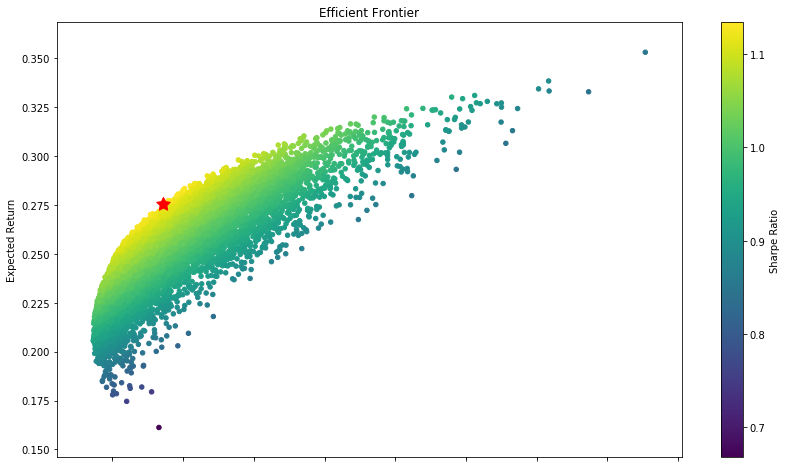

In [238]:
portfolios.plot.scatter(x = 'Volatility', y = 'Return', c = 'Sharpe Ratio', cmap= 'viridis', figsize = (14,8));
plt.scatter(max_sharpe[1], max_sharpe[0], marker=(5,1,0), color='r', s = 200)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

In [239]:
max_sharpe.to_frame().T

,Return,Volatility,Sharpe Ratio,AAPL,MSFT,NFLX,AMZN,GOOG
4494,0.275565,0.242994,1.134041,0.390438,0.165497,0.187379,0.252847,0.003839
